# Titanic Comptetion

## 1. Introduction

### 1.1. Problem Statement

This competition revolves around a classification problem for the titanic dataset. Apparently, not everyone on the titanic ship died during the horrifying event you all know. Although it seems that people should have survived at random, there seems to have been a correlation between certain attributes of the passengers and their chance of survival!
Here are some of these attributes:

| **Attribute**  |              **Description**           | **Column in dataset**  |
|----------------|:---------------------------------------|:-----------------------|
|  Ticket class  |  Three possible classes: 1st, 2nd, 3rd |        *pclass*        |
|     Gender     |  The sex of the passenger              |         *sex*          |
|      Age       |  Age of the passenger in years         |         *age*          |
|   Siblings     |  *Number* of siblings aboard Titanic   |         *sibsp*        |
|    Parents     |  *Number* of parents aboard Titani     |         *parch*        |
|     Ticket     |  Ticket number of the passenger        |         *ticket*       |
|      Fare      |  Passenger fare                        |         *fare*         |
|      Cabin     |  Cabin number of the passenger         |         *cabin*        |
| Port of entry  |  The station at which passneger boarded|         *embarked*     |

### 1.2. Dataset

There are two ```.csv``` files to this problem which are placed in the ```./data/``` directory:

- **train.csv**: which contains the attributes in the above table along with an extra column called *survived* which indicates whether the passenger has survived or not (1 for survived and 0 for not survivied). This dataset is meant to be used for model trainig.
- **test.csv**: which contains only the attributes of the above table without the *survived* column since this dataset is meant for testing the model and the answers for it are hidden. The performance of your model on this dataset will be used to rank the model in the competition.

### 1.3. Output

The output of the model is the answers it gives for the examples provided in test.csv file. Therefore, the output is a ```.csv``` file that contains two columns:

- **PassengerID**: which is the passenger ID of the passengers in the test.csv file.
- **Survived**: which is 1 for people who survived and 0 otherwise. These values are the predictions given by the trained model.

# 2. Data Insight

In [3]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [128]:
# Setting up the directories.
CURRENT_DIR = './'
DATA_DIR = CURRENT_DIR + 'data/'
TRAIN_FILE_NAME = 'titanic_train.csv'
TEST_FILE_NAME = 'titanic_test.csv'

In [129]:
# Loading data and print the first few rows
train_ds = pd.read_csv(DATA_DIR + TRAIN_FILE_NAME)
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
# Checking for duplicate values among person names
duplicate_num = len(train_ds.duplicated(subset=['Name'])[train_ds.duplicated(subset=['Name'])])
if duplicate_num > 0:
    print(f'We have {duplicate_num} duplicate persons in the dataset')
else:
    print('There are no duplicate persons')

There are no duplicate persons


In [131]:
# Showing the duplicate values based on tickets
train_ds[train_ds.duplicated(subset=['Ticket'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [132]:
train_ds[train_ds['Ticket'] == '382652']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q


In [133]:
for c in train_ds.columns:
    print(f'{c} column has {train_ds[c].isna().sum()} NaN values')

PassengerId column has 0 NaN values
Survived column has 0 NaN values
Pclass column has 0 NaN values
Name column has 0 NaN values
Sex column has 0 NaN values
Age column has 177 NaN values
SibSp column has 0 NaN values
Parch column has 0 NaN values
Ticket column has 0 NaN values
Fare column has 0 NaN values
Cabin column has 687 NaN values
Embarked column has 2 NaN values


In [134]:
# Replacing NaNs in Age and Embarked columns with median and most frequent values
train_ds['Age'].fillna(train_ds['Age'].median(), inplace=True)
train_ds['Embarked'].fillna(train_ds['Embarked'].mode(), inplace=True)

In [135]:
# Losing the useless columns
train_ds.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

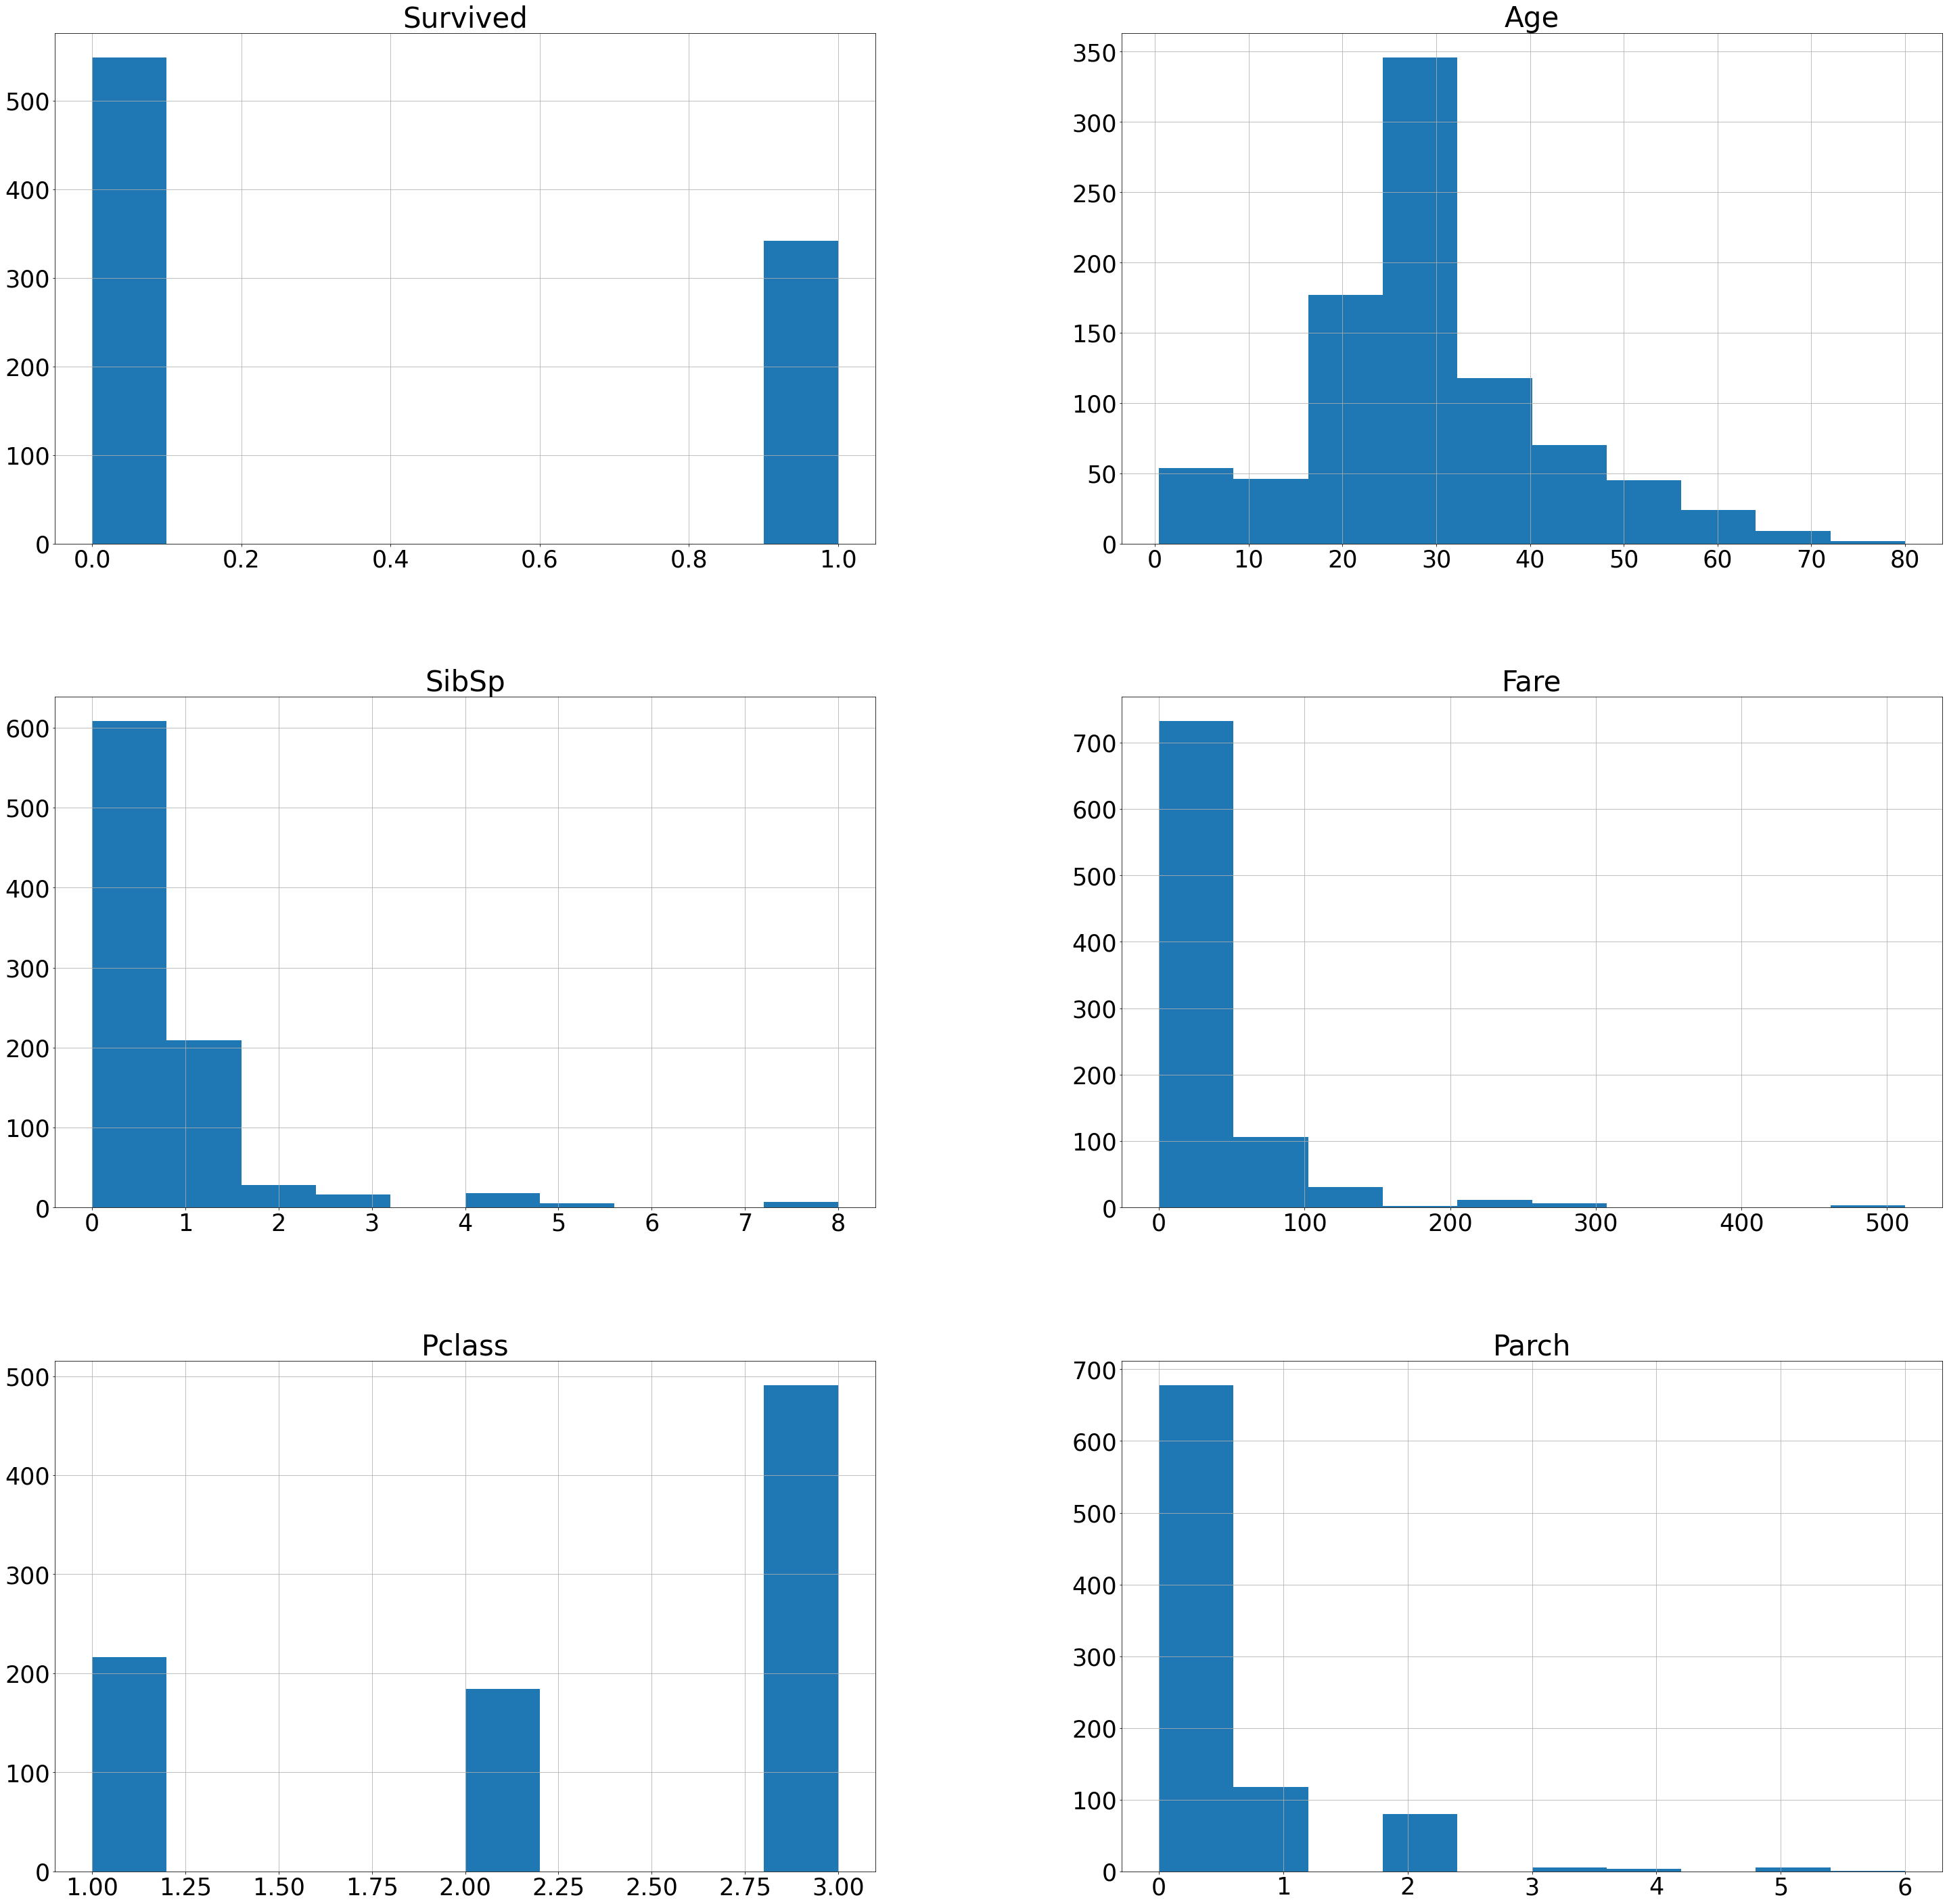

In [126]:
# Distribution of interesting parameters
plt.rcParams.update({'font.size': 35})
hist_columns = ['Survived', 'Age', 'Embarked', 'Sex', 'SibSp', 'Fare', 'Pclass', 'Parch']
train_ds.hist(column=hist_columns, figsize=(50.0, 50.0), grid=True)